Import and set the api keys

In [51]:
import os
import pandas as pd
from dotenv import load_dotenv

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import matplotlib.pyplot as plt

# load the .env file variables
load_dotenv()

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("SECRET_ID")


Set the artist and save the data from the api

In [60]:
artist_uri = 'spotify:artist:3K49BAizpfWdDws7kKsdwu'

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id,client_secret=client_secret))
results = spotify.artist_top_tracks(artist_uri)


In [61]:
def milisegundos_a_sexagesimal(milisegundos):
    # Convertir milisegundos a segundos
    segundos = milisegundos / 1000

    # Calcular minutos y segundos
    minutos = segundos // 60
    segundos %= 60

    # Calcular horas y minutos
    horas = minutos // 60
    minutos %= 60

    # Formatear en formato sexagesimal
    tiempo_sexagesimal = "{:02}:{:02}:{:02}".format(int(horas), int(minutos), int(segundos))

    return tiempo_sexagesimal

In [68]:
df = pd.DataFrame(results['tracks'])

df['duration_minutes'] = df['duration_ms'].apply(milisegundos_a_sexagesimal)

df[['name','duration_ms','popularity','duration_minutes']].sort_values('duration_ms',ascending=False)

,name,duration_ms,popularity,duration_minutes
0,SR20DET,278250,60,00:04:38
7,//obsession//,228678,42,00:03:48
4,"Satellite from days of old, lead me to your ac...",216000,44,00:03:36
2,GORE-TEX COVERS MY SOUL,191000,48,00:03:11
5,ominous,157935,44,00:02:37
8,60FPS,144500,41,00:02:24
6,Dreamstation,139058,38,00:02:19
3,haunted.,137142,47,00:02:17
9,Thunderbolt - Blksmiith Remix,135160,41,00:02:15
1,F R A G M E N T,60000,54,00:01:00


plot an scatter to see relationship

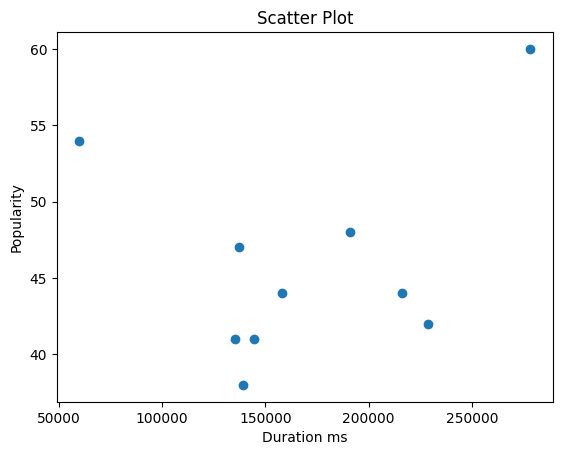

In [69]:
# Crear el scatter plot
plt.scatter(df['duration_ms'], df['popularity'])

# Agregar etiquetas y título
plt.xlabel('Duration ms')
plt.ylabel('Popularity')
plt.title('Scatter Plot')

# Mostrar el scatter plot
plt.show()

different artists make completely different charts, 10 songs are not enough to determine if duration has any relevance to popularity, by common sense we can say that it has NO relevance